In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
from datetime import datetime

# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|██████████| 6.46M/6.46M [00:00<00:00, 30.0MB/s]


In [2]:
# Visit the website to Scrape site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)


In [3]:
html = browser.html
news_soup = soup(html, 'html.parser')
slide_elem = news_soup.select('div.list_text')

In [4]:
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [5]:
mars_df = df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [6]:
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [7]:
mars_df['terrestrial_date']= pd.to_datetime(mars_df['terrestrial_date'], format= '%Y-%m-%d')

In [8]:
# Examine data types
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [9]:
#How many months exist on Mars?
months_mars_df = mars_df.drop_duplicates('month')
months_mars_df["month"].count()

12

In [10]:
#How many Martian (and not Earth) days worth of data exist in the scraped dataset?
mars_df['sol'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1867 entries, 0 to 1866
Series name: sol
Non-Null Count  Dtype
--------------  -----
1867 non-null   int64
dtypes: int64(1)
memory usage: 14.7 KB


In [11]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)?
#Get the answer by averaging the minimum daily temperature of all the months.

avg_min_temp = mars_df.groupby('month') ['min_temp'].mean() 
df=avg_min_temp.to_frame()
df=df.reset_index()
df

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


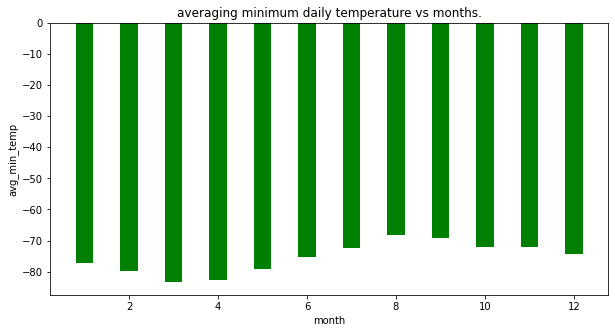

In [12]:
#Plot the results as a bar chart.
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(df['month'], df['min_temp'], color ='green',
        width = 0.4)
 
plt.xlabel("month")
plt.ylabel("avg_min_temp")
plt.title("averaging minimum daily temperature vs months.")
plt.show()

#Per the diagram below, the coldest month on mars at at the location of Curiosity
#is month 3 and the warmest is month 8.


In [13]:
#Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging
#the daily atmospheric pressure of all the months. Plot the results as a bar chart.
avg_atm_pressure = mars_df.groupby('month') ['pressure'].mean() 
pressure_df=avg_atm_pressure.to_frame()
pressure_df=pressure_df.reset_index()
pressure_df

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


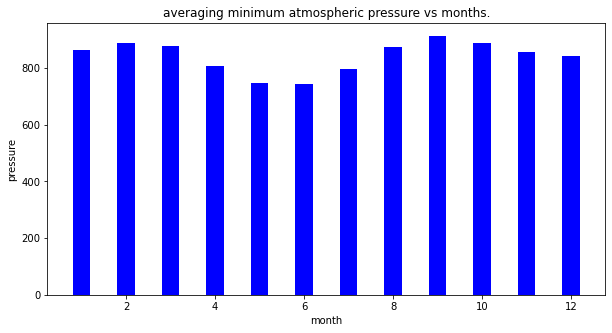

In [14]:
#Plot the results as a bar chart.
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(pressure_df['month'], pressure_df['pressure'], color ='blue',
        width = 0.4)
 
plt.xlabel("month")
plt.ylabel("pressure")
plt.title("averaging minimum atmospheric pressure vs months.")
plt.show()

#Per the diagram below, the month with the lowest atmospheric pressure on mars at at the location of Curiosity
#is month 6 and the highest is month 9.

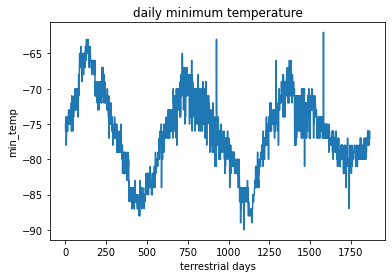

In [22]:
#About how many terrestrial (Earth) days exist in a Martian year?
#That is, in the time that Mars circles the Sun once, how many days
#elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.
#Plot the results as a bar chart.
mars_df.min_temp.plot()
 
plt.xlabel("terrestrial days")
plt.ylabel("min_temp")
plt.title("daily minimum temperature")
plt.show()


In [18]:
mars_df.to_csv(r'D:\WASHU DATA Analytics\WUSTL-VIRT-DATA-PT-08-2022-U-B-main\11-Web-Scraping\Challange\mars_data.csv')

In [17]:
browser.quit()